# Communicate Data Funding ( USA YouTube dataset)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import json
import os
from wordcloud import WordCloud
from PIL import Image
import requests

In [2]:
youtube_df = pd.read_csv('USvideos.csv')

In [3]:
youtube_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [4]:
youtube_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


In [5]:
youtube_df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [6]:
cate_id_to_category={}

with open('US_category_id.json', 'r') as f:
    data=json.load(f)
    for category in data['items']:
        cate_id_to_category[category['id']] = category['snippet']['title']

In [7]:
cate_id_to_category

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [8]:
youtube_df.insert(4,'category', youtube_df['category_id'].astype(str).map(cate_id_to_category))
youtube_df.head()

,video_id,trending_date,title,channel_title,category,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,Entertainment,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [9]:
youtube_df.sort_values('views',ascending=False,inplace=True)
youtube_df.head(10)

,video_id,trending_date,title,channel_title,category,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
38547,VYOjWnS4cMY,18.02.06,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",225211923,5023450,343541,517232,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
38345,VYOjWnS4cMY,18.01.06,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",220490543,4962403,338105,512337,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
38146,VYOjWnS4cMY,18.31.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",217750076,4934188,335462,509799,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
37935,VYOjWnS4cMY,18.30.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",210338856,4836448,326902,501722,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
37730,VYOjWnS4cMY,18.29.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",205643016,4776680,321493,496211,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
37531,VYOjWnS4cMY,18.28.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",200820941,4714942,316129,491005,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
37333,VYOjWnS4cMY,18.27.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",196222618,4656929,311042,485797,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
37123,VYOjWnS4cMY,18.26.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",190950401,4594931,305435,479917,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
36913,VYOjWnS4cMY,18.25.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",184446490,4512326,298157,473039,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...
36710,VYOjWnS4cMY,18.24.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",179045286,4437175,291098,466470,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...


In [10]:
#The most viewed video in 10 days is the offical video of "This is America"
#This is incredible (i love childish gambino btw), but we want to see top 10 most viewed videos 
#So lets remove the duplicate

In [11]:
youtube = youtube_df[~youtube_df['title'].duplicated(keep='first')] 
youtube['title'].duplicated().any()

False

In [68]:
youtube.sort_values('views',ascending=False,inplace=True)
youtube.head(10)

,video_id,trending_date,title,channel_title,publish_date,category,category_id,publish_time,tags,views,...,dislike_rate,comment_rate,publish_day,publish_month,publish_year,trending_day,trending_month,trending_year,trending_duration_y,trending_duration
0,VYOjWnS4cMY,2018-06-02,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,2018-05-06,Music,10,04:00:07,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",225211923,...,0.152541,0.229665,6,5,2018,2,6,2018,25,25
1,FlsCjmMhFmw,2017-12-14,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,2017-12-06,Entertainment,24,17:58:51,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",149376127,...,1.099948,0.542723,6,12,2017,14,12,2017,8,8
2,ffxKSjUwKdU,2018-05-14,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,2018-04-20,Music,10,04:00:03,"Ariana|""Grande""|""No""|""Tears""|""Left""|""To""|""Cry""...",148689896,...,0.087095,0.162781,20,4,2018,14,5,2018,20,20
3,zEf423kYfqk,2018-05-15,"Becky G, Natti Natasha - Sin Pijama (Official ...",BeckyGVEVO,2018-04-20,Music,10,10:40:51,"Becky G|""Natti Natasha""|""Natti Natasha Music""|...",139334502,...,0.085979,0.060244,20,4,2018,15,5,2018,20,20
4,7C2z4GqqS5E,2018-06-01,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,2018-05-18,Music,10,09:00:02,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",123010920,...,0.168190,0.998818,18,5,2018,1,6,2018,14,14
5,M4ZoCHID9GI,2018-05-14,The Weeknd - Call Out My Name (Official Video),TheWeekndVEVO,2018-04-12,Music,10,16:00:04,"The|""Weeknd""|""Call""|""Out""|""My""|""Name""",122544931,...,0.033324,0.045143,12,4,2018,14,5,2018,19,19
6,TyHvyGVs42U,2017-11-26,"Luis Fonsi, Demi Lovato - Échame La Culpa",LuisFonsiVEVO,2017-11-17,Music,10,05:00:01,"Luis|""Fonsi""|""Demi""|""Lovato""|""Échame""|""La""|""Cu...",102012605,...,0.114884,0.131576,17,11,2017,26,11,2017,10,10
7,xTlNMmZKwpA,2018-06-14,"Cardi B, Bad Bunny & J Balvin - I Like It [Off...",Cardi B,2018-05-29,Music,10,14:05:10,"Cardi B|""I Like It""|""Invasion of Privacy""|""Bad...",94254507,...,0.108721,0.107238,29,5,2018,14,6,2018,16,16
8,6ZfuNTqbHE8,2017-12-08,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,2017-11-29,Entertainment,24,13:26:24,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",91933007,...,0.058422,0.381210,29,11,2017,8,12,2017,9,9
9,-BQJo3vK8O8,2018-03-25,Maluma - El Préstamo (Official Video),MalumaVEVO,2018-03-09,Music,10,11:00:01,"Maluma Music|""Maluma Official Video""|""Maluma V...",87264467,...,0.081928,0.041191,9,3,2018,25,3,2018,11,11


In [13]:
def top10(youtube,column,num):
    top_youtube=youtube.sort_values(column,ascending=False).iloc[:num]
    
    fig,ax=plt.subplots()
    ax.barh(top_youtube['title'],top_youtube[column],color = 'darkslategrey')
    
    ax.set(xlabel=column,title ='Top %s %s of video' %(num,column))

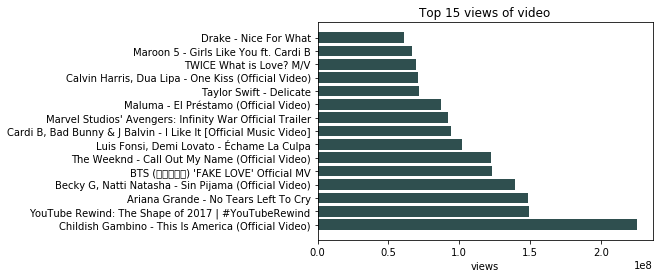

In [14]:
top10(youtube, 'views', 15)

In [15]:
#Till now, Maluma has 345,966,484 views, 1.6m likes, 165k dislikes, urban pop

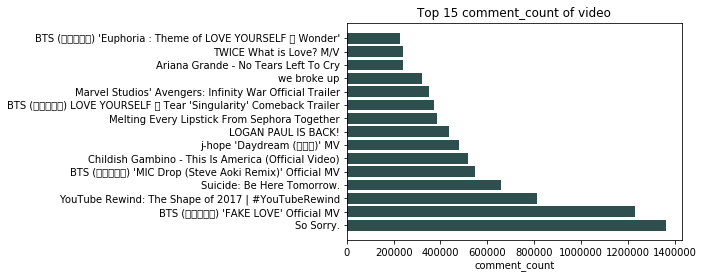

In [16]:
top10(youtube, 'comment_count', 15)

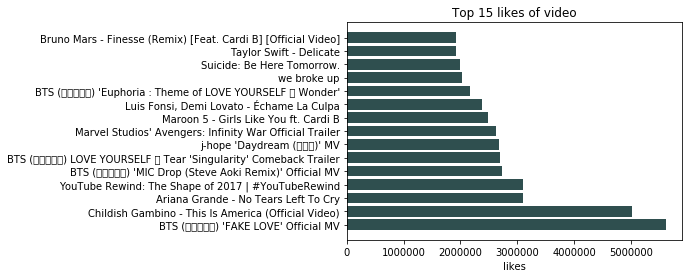

In [17]:
top10(youtube, 'likes', 15)

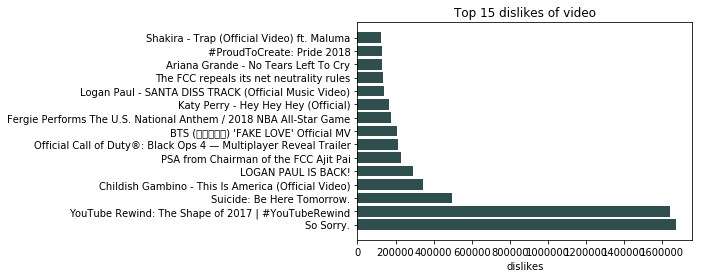

In [18]:
top10(youtube, 'dislikes', 15)

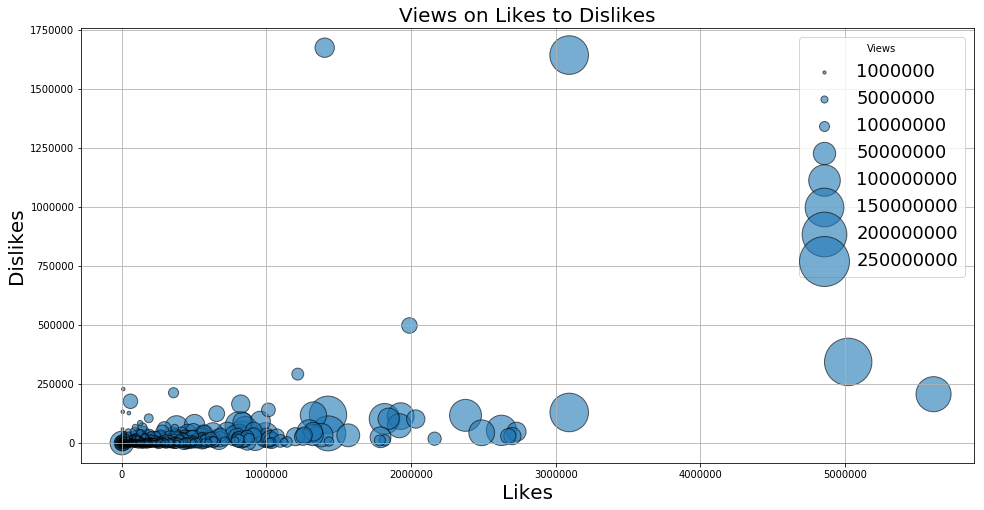

In [101]:
plt.figure(figsize = (16,8))
plt.grid()
plt.scatter(data = youtube, x = 'likes', y = 'dislikes', s = youtube['views']/100000, edgecolors='black', alpha = 0.6)
plt.title('Views on Likes to Dislikes', fontsize = 20)
plt.xlabel('Likes', fontsize = 20)
plt.ylabel('Dislikes', fontsize = 20)

size = [1000000, 5000000, 10000000, 50000000, 100000000, 150000000, 200000000, 250000000]
col = sns.color_palette()[0]
leg_obj = []
for s in size:
    leg_obj.append(plt.scatter([],[], s=s/100000, color = col, alpha = 0.6, edgecolors='black'))
plt.legend(leg_obj, size, title = 'Views',prop= {'size': 18})

Text(0.5,0,'Categoty')

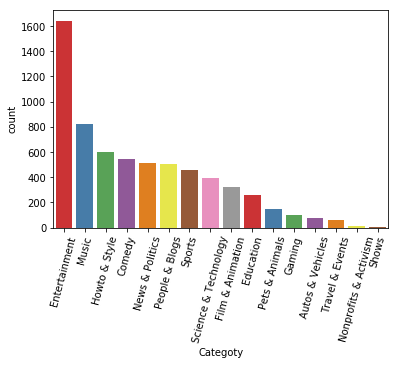

In [20]:
sns.countplot(data = youtube, x = 'category', palette = 'Set1', order = ['Entertainment', 'Music','Howto & Style','Comedy','News & Politics','People & Blogs','Sports','Science & Technology','Film & Animation','Education','Pets & Animals','Gaming','Autos & Vehicles','Travel & Events','Nonprofits & Activism', 'Shows'])
plt.xticks(rotation = 75)
plt.xlabel('Categoty')

In [55]:
duration = youtube_df['title'].value_counts().to_frame()
duration = duration.reset_index()
duration.columns = ['title', 'trending_duration']
duration.head()

,title,trending_duration
0,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,30
1,"The ULTIMATE $30,000 Gaming PC Setup",29
2,Mission: Impossible - Fallout (2018) - Officia...,29
3,Rooster Teeth Animated Adventures - Millie So ...,29
4,Why I'm So Scared (being myself and crying too...,29


Text(0.5,1,'Trending duration on Category')

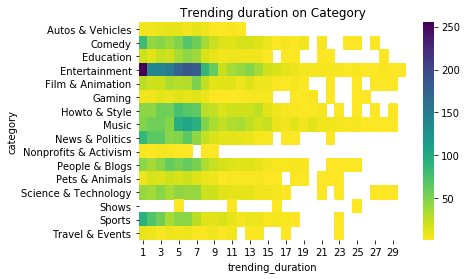

In [56]:
youtube= pd.merge(youtube, duration, on = 'title')
sns.heatmap(youtube.groupby(['category','trending_duration']).count()['video_id'].unstack(), cmap = 'viridis_r')
plt.title('Trending duration on Category')

In [57]:
def wc(text):
    plt.figure(figsize=(12,8))
    mask = np.array(Image.open(requests.get('https://i.amz.mshcdn.com/vSU-CqDsFj8e-fNJXqD_GBq5HKM=/950x534/filters:quality(90)/2013%2F08%2F29%2F86%2Fyoutubelogo.3ffc3.jpg', stream=True).raw))
    wc = WordCloud(max_words=100, max_font_size=100, colormap='Dark2',background_color='white', mask = mask).generate(text)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')

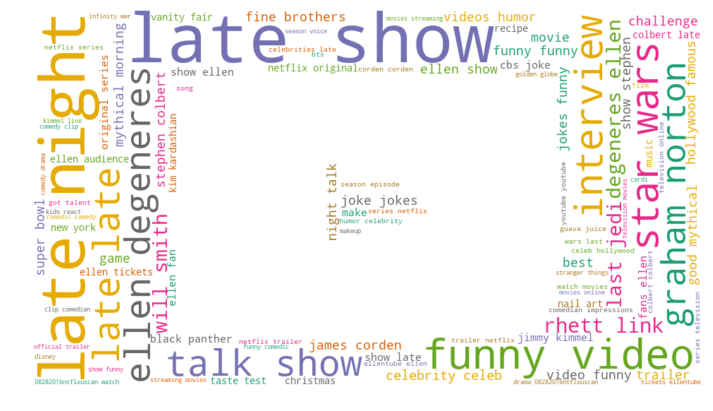

In [58]:
tags = youtube[youtube['category'] == 'Entertainment']['tags'].str.lower().str.cat(sep = ' ')
wc(tags)

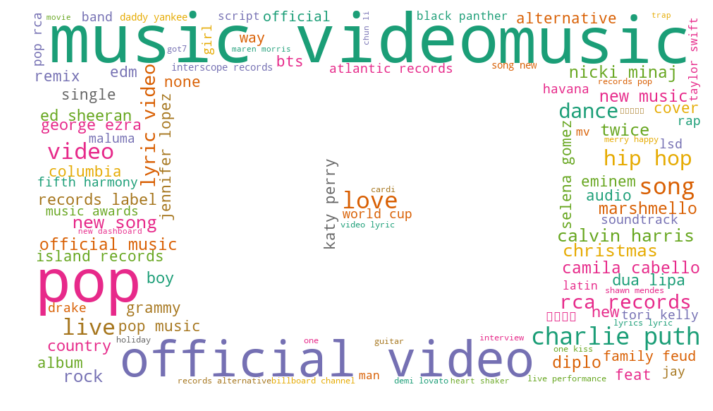

In [59]:
tags = youtube[youtube['category'] == 'Music']['tags'].str.lower().str.cat(sep = ' ')
wc(tags)

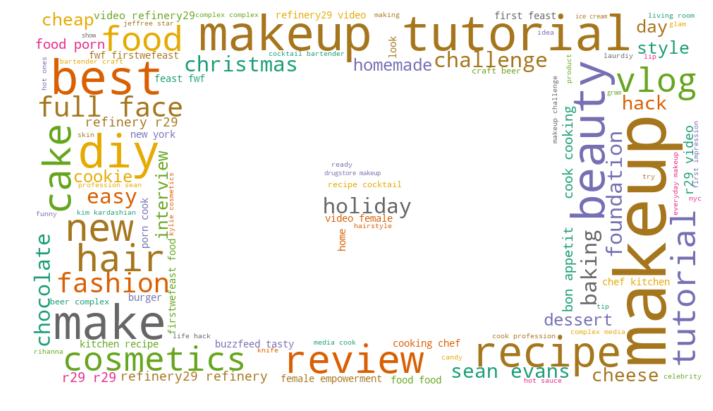

In [60]:
tags = youtube[youtube['category'] == 'Howto & Style']['tags'].str.lower().str.cat(sep = ' ')
wc(tags)

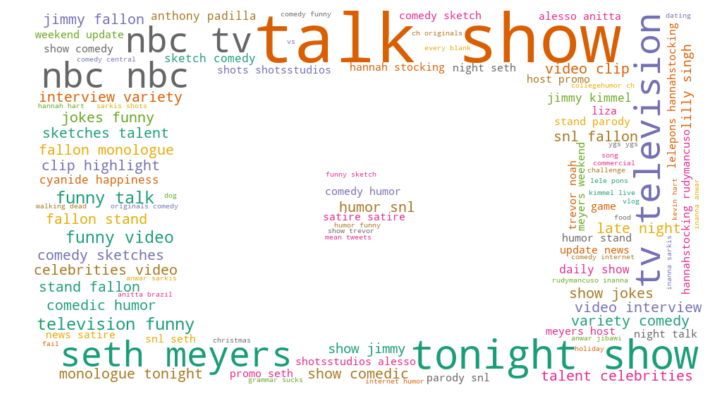

In [62]:
tags = youtube[youtube['category'] == 'Comedy']['tags'].str.lower().str.cat(sep = ' ')
wc(tags)

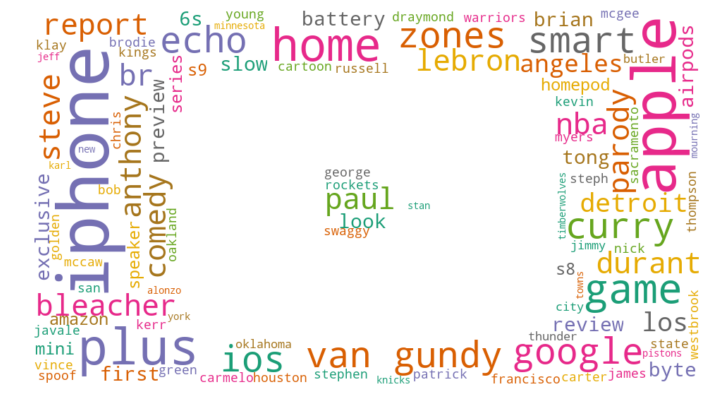

In [64]:
tags = youtube[youtube['category'] == 'Shows']['tags'].str.lower().str.cat(sep = ' ')
wc(tags)

In [65]:
youtube[youtube['category']=='Shows'].title

1632    Game of Zones - Game of Zones - S5:E1: 'A Gold...
1730         Game of Zones - S5:E5: The Isle of Van Gundy
4706    You're not crazy. Apple is slowing down older ...
5442    Apple HomePod: Everything to know before you b...
Name: title, dtype: object

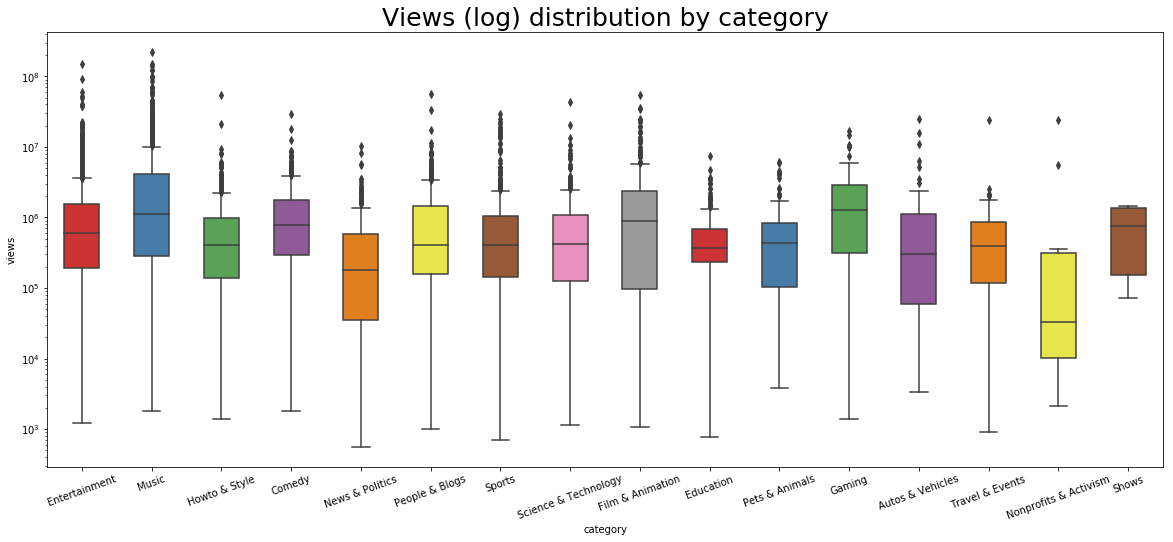

In [23]:
plt.figure(figsize = (20,8))
plt.title('Views (log) distribution by category', fontsize = 25)
plt.yscale('log')
plt.xticks(rotation=20)
sns.boxplot(x='category',y='views',data=youtube, width=0.5,palette='Set1', order = ['Entertainment', 'Music','Howto & Style','Comedy','News & Politics','People & Blogs','Sports','Science & Technology','Film & Animation','Education','Pets & Animals','Gaming','Autos & Vehicles','Travel & Events','Nonprofits & Activism', 'Shows'])

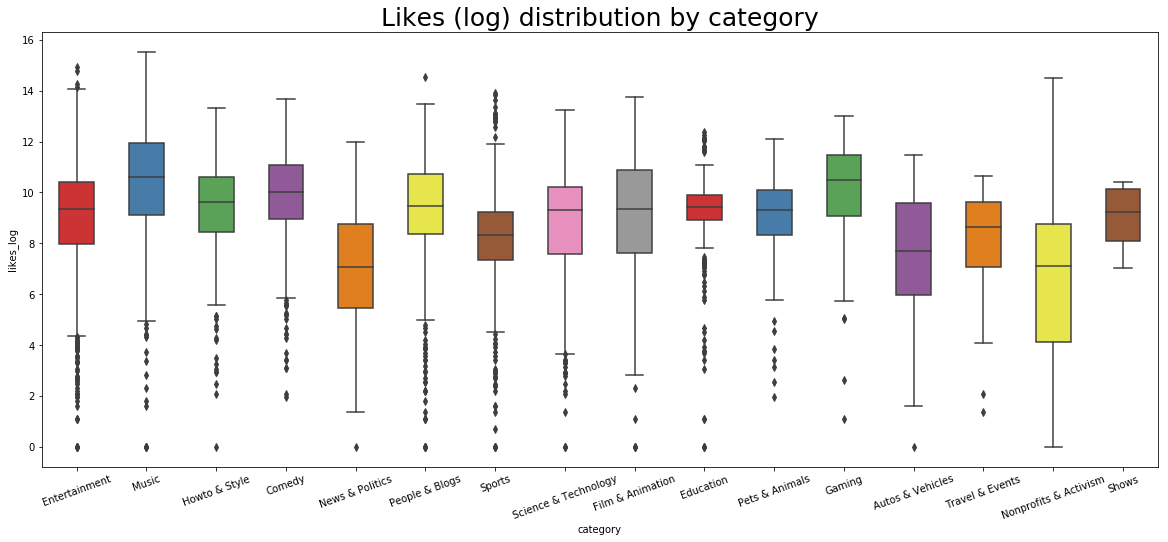

In [24]:
youtube['likes_log'] = np.log(youtube['likes']+1)

plt.figure(figsize = (20,8))
plt.title('Likes (log) distribution by category', fontsize = 25)
plt.xticks(rotation=20)
sns.boxplot(x='category',y='likes_log',data=youtube, width=0.5,palette='Set1', order = ['Entertainment', 'Music','Howto & Style','Comedy','News & Politics','People & Blogs','Sports','Science & Technology','Film & Animation','Education','Pets & Animals','Gaming','Autos & Vehicles','Travel & Events','Nonprofits & Activism', 'Shows'])

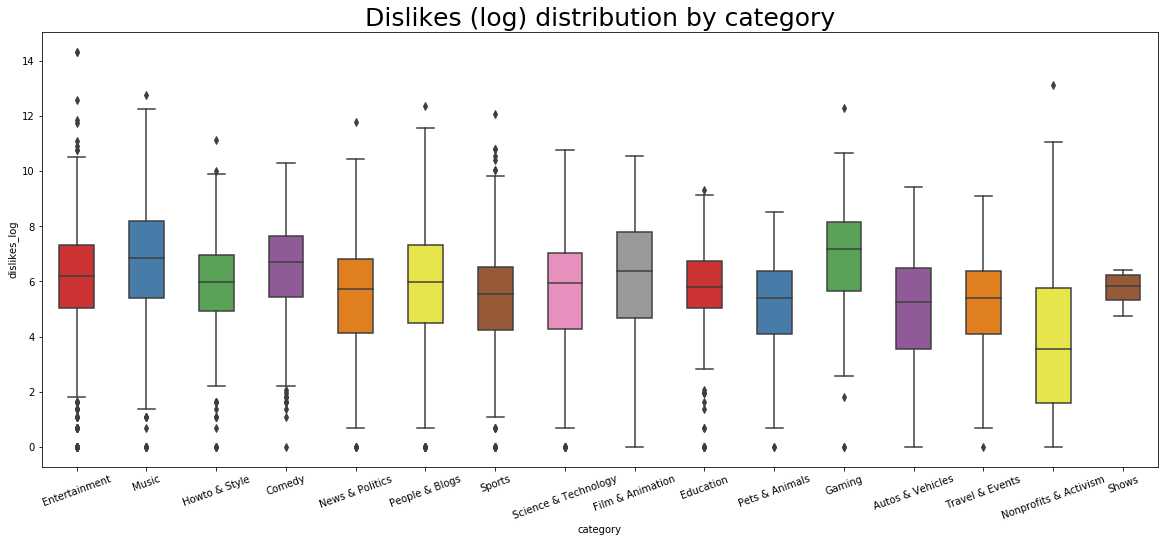

In [25]:
youtube['dislikes_log'] = np.log(youtube['dislikes'] + 1)

plt.figure(figsize = (20,8))
plt.title('Dislikes (log) distribution by category', fontsize = 25)
plt.xticks(rotation=20)
sns.boxplot(x='category',y='dislikes_log',data=youtube, width=0.5,palette='Set1', order = ['Entertainment', 'Music','Howto & Style','Comedy','News & Politics','People & Blogs','Sports','Science & Technology','Film & Animation','Education','Pets & Animals','Gaming','Autos & Vehicles','Travel & Events','Nonprofits & Activism', 'Shows'])

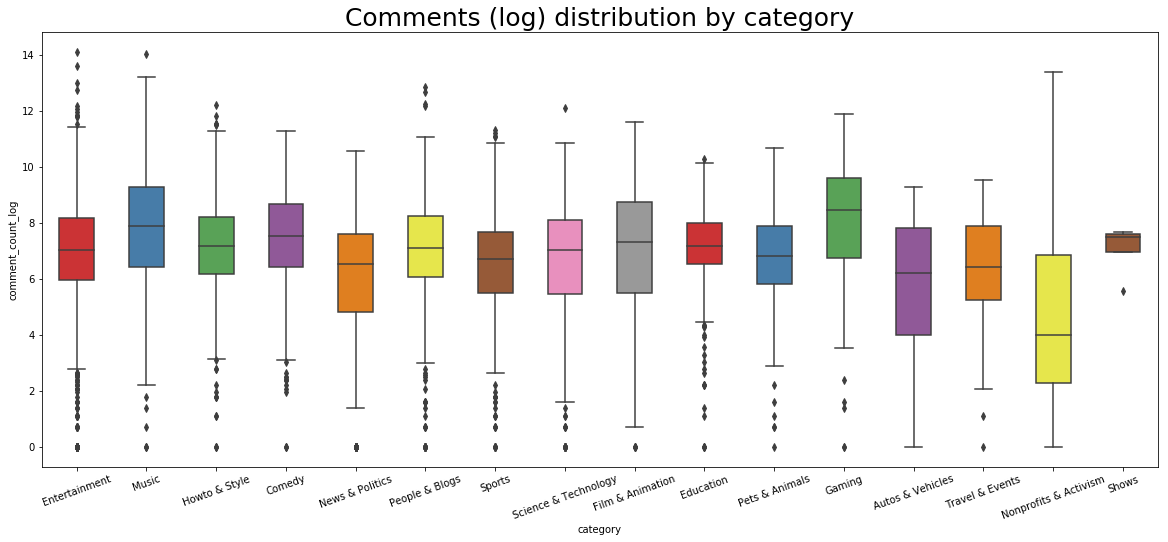

In [26]:
youtube['comment_count_log'] = np.log(youtube['comment_count'] + 1)

plt.figure(figsize = (20,8))
plt.title('Comments (log) distribution by category', fontsize = 25)
plt.xticks(rotation=20)
sns.boxplot(x='category',y='comment_count_log',data=youtube, width=0.5,palette='Set1', order = ['Entertainment', 'Music','Howto & Style','Comedy','News & Politics','People & Blogs','Sports','Science & Technology','Film & Animation','Education','Pets & Animals','Gaming','Autos & Vehicles','Travel & Events','Nonprofits & Activism', 'Shows'])

In [27]:
youtube['like_rate']=youtube['likes']/youtube['views']*100
youtube['dislike_rate']=youtube['dislikes']/youtube['views']*100
youtube['comment_rate']=youtube['comment_count']/youtube['views']*100

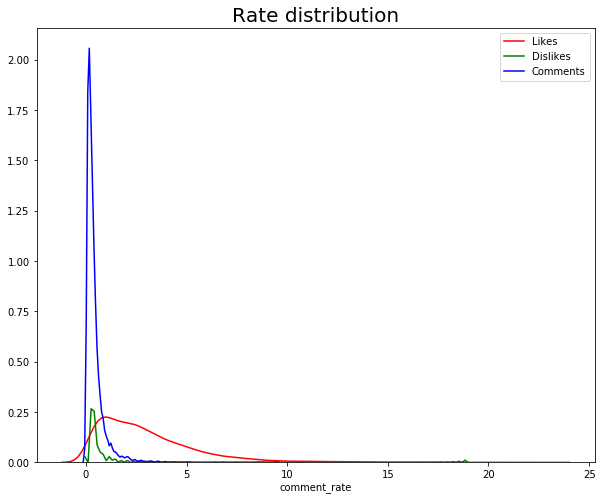

In [28]:
plt.figure(figsize = (10,8))
plt.title('Rate distribution', fontsize = 20)
sns.distplot(youtube['like_rate'],color='red',hist=False,label='Likes')
sns.distplot(youtube['dislike_rate'],color='green',hist=False,label='Dislikes')
sns.distplot(youtube['comment_rate'],color='blue',hist=False,label='Comments')

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


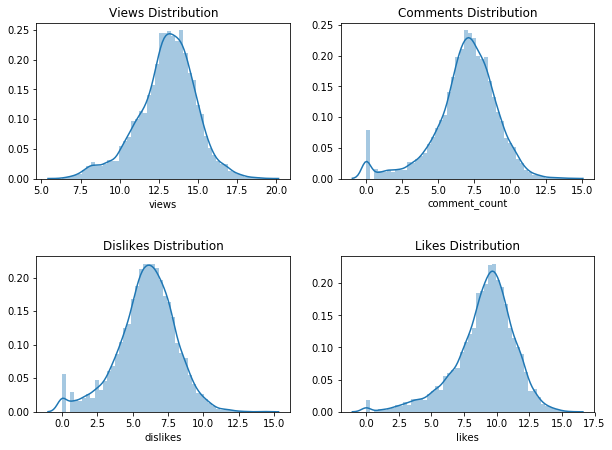

In [29]:
plt.figure(figsize=(10,8))

plt.subplot(221)
sns.distplot(np.log(youtube['views']+1))
plt.title('Views Distribution',fontsize=12)

plt.subplot(222)
sns.distplot(np.log(youtube['comment_count']+1))
plt.title('Comments Distribution', fontsize=12)

plt.subplot(223)
sns.distplot(np.log(youtube['dislikes']+1))
plt.title('Dislikes Distribution', fontsize=12)

plt.subplot(224)
sns.distplot(np.log(youtube['likes']+1))
plt.title('Likes Distribution', fontsize=12)

plt.subplots_adjust(wspace = 0.2, hspace = 0.5,top = 0.8)

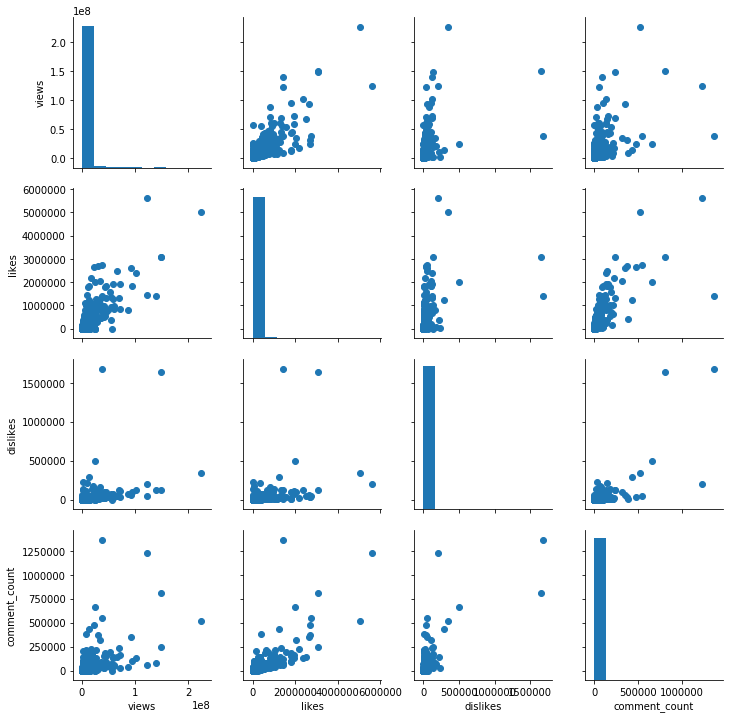

In [30]:
youtube_stat = ['views', 'likes', 'dislikes', 'comment_count']
g = sns.PairGrid(data = youtube, vars = youtube_stat, )
g = g.map_offdiag(plt.scatter)
g.map_diag(plt.hist)

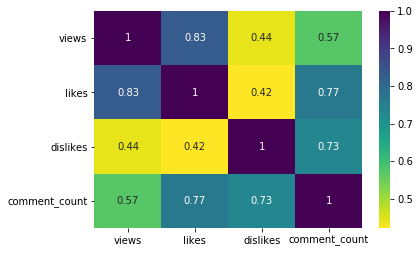

In [31]:
sns.heatmap(youtube[['views', 'likes', 'dislikes', 'comment_count']].corr(), annot=True, cmap = 'viridis_r')

In [111]:
publisher = youtube.groupby('channel_title').count()['video_id'].sort_values(ascending = False).to_frame()
publisher.head()

,video_id
channel_title,
ESPN,84
TheEllenShow,74
The Tonight Show Starring Jimmy Fallon,72
Jimmy Kimmel Live,70
Netflix,58


Text(0.5,0,'count')

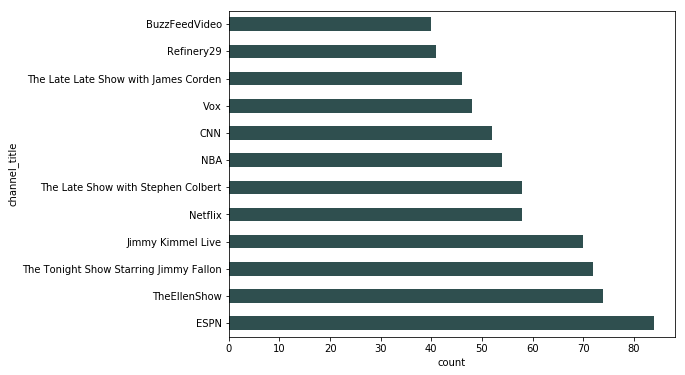

In [109]:
top_publisher = publisher[publisher['video_id']>=40]
top_publisher.plot(kind = 'barh',legend=False, color='darkslategrey',figsize=(8,6))
plt.xlabel('count')

In [34]:
youtube['trending_date'] = pd.to_datetime(youtube['trending_date'], format='%y.%d.%m')
youtube['publish_time'] = pd.to_datetime(youtube['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ',errors='coerce')

youtube.insert(4, 'publish_date', youtube['publish_time'].dt.date)
youtube['publish_time'] = youtube['publish_time'].dt.time
youtube[['publish_date', 'publish_time']].head(20)

,publish_date,publish_time
0,2018-05-06,04:00:07
1,2017-12-06,17:58:51
2,2018-04-20,04:00:03
3,2018-04-20,10:40:51
4,2018-05-18,09:00:02
5,2018-04-12,16:00:04
6,2017-11-17,05:00:01
7,2018-05-29,14:05:10
8,2017-11-29,13:26:24
9,2018-03-09,11:00:01


In [35]:
youtube['publish_day']=youtube['publish_date'].apply(lambda time : time.day)
youtube['publish_month']=youtube['publish_date'].apply(lambda time : time.month)
youtube['publish_year']=youtube['publish_date'].apply(lambda time : time.year)

youtube['trending_day']=youtube['trending_date'].apply(lambda time : time.day)
youtube['trending_month']=youtube['trending_date'].apply(lambda time : time.month)
youtube['trending_year']=youtube['trending_date'].apply(lambda time : time.year)

In [104]:
#BEST time to publish!

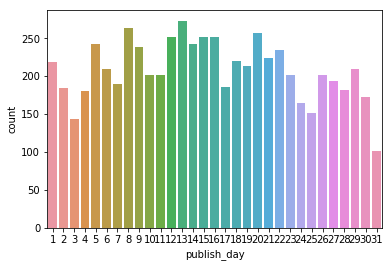

In [37]:
sns.countplot(data = youtube, x = 'publish_day')

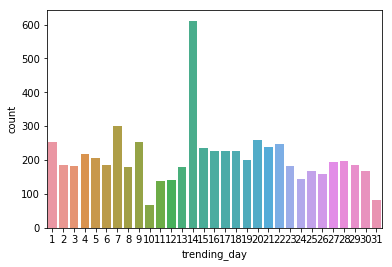

In [38]:
sns.countplot(data = youtube, x = 'trending_day')

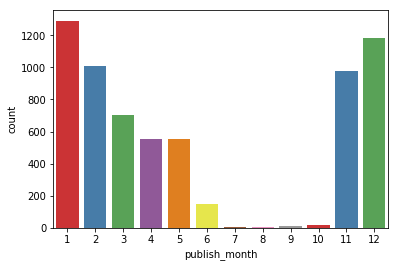

In [52]:
sns.countplot(data = youtube, x = 'publish_month', palette='Set1')

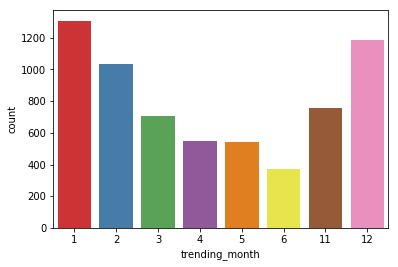

In [53]:
sns.countplot(data = youtube, x = 'trending_month',palette='Set1')

In [41]:
a = youtube[(youtube['category']=='Entertainment')]
b = youtube[(youtube['category']=='Music')]
c = youtube[(youtube['category']=='Howto & Style')]
d = youtube[(youtube['category']=='Comedy')]
e = youtube[(youtube['category']=='News & Politics')]
f = youtube[(youtube['category']=='People & Blogs')]
g = youtube[(youtube['category']=='Sports')]       
h = youtube[(youtube['category']=='Science & Technology')]    
i = youtube[(youtube['category']=='Film & Animation')]     
j = youtube[(youtube['category']=='Education')]                
k = youtube[(youtube['category']=='Pets & Animals')]            
l = youtube[(youtube['category']=='Gaming')]                   
m = youtube[(youtube['category']=='Autos & Vehicles')]           
n = youtube[(youtube['category']=='Travel & Events')]            
o = youtube[(youtube['category']=='Nonprofits & Activism')]      
p = youtube[(youtube['category']=='Shows')]

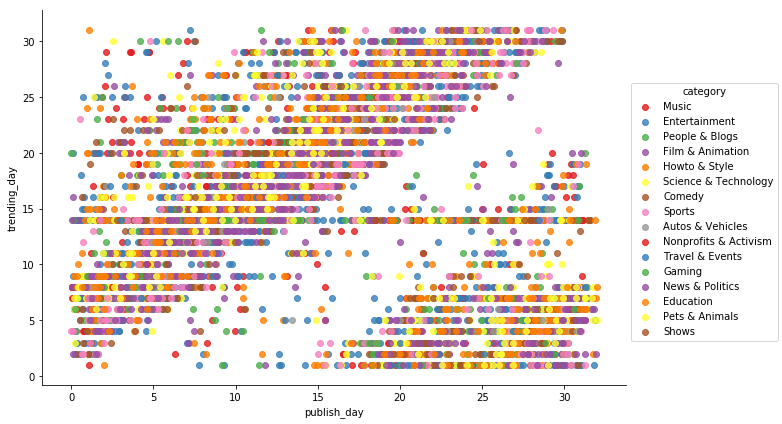

In [42]:
g = sns.FacetGrid(data = youtube, hue = 'category', size = 6, aspect = 1.5, palette='Set1')
g.map(sns.regplot, 'publish_day', 'trending_day', fit_reg=False, x_jitter=1)
g.add_legend()